Today we're going to look at the simplest models of neural networks that we showed in lecture - the perceptron and the multilayer perceptron. 

# Perceptron

The implementation of the perceptron algorithm is simple - the perceptron parameters are just one vector and the adaptation rule is also simple. We implement it as a class that has an interface inspired by the popular scikit-learn library, i.e. the parameters are set in the constructor and the class then has two methods - `fit(X, y)` and `predict(X)`.

We use matrix notation in the methods - we write the weighted sum as a scalar product. This, combined with the use of the `numpy` library, greatly simplifies the implementation and makes the algorithm faster.

In [11]:
import numpy as np

class Perceptron:
    
    def __init__(self, lr, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, train_X, train_y):
        train_x = np.array(train_X)
        train_x = self._add_ones(train_x)
        self.w_ = np.zeros(train_x.shape[1])
        
        for _ in range(self.max_iter):
            for x,y in zip(train_x, train_y):
                y_hat = (np.sign(np.dot(x, self.w_.T)) + 1)/2 # we cannot use predict here, it would append another '1'
                self.w_ = self.w_ + self.lr*(y - y_hat)*x
        
    def predict(self, X):
        x = np.array(X)
        x = self._add_ones(x)
        return (np.sign(np.dot(x, self.w_.T)) + 1)/2 # sign -1 or 1 -> change to 0 or 1
    
    def _add_ones(self, x): # add a column of 1s instead of bias
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

To test this, we generate some data. We will use simple data generators from the scikit-learn library to create data with two classes. Note the different results if the classes are separable and if they are not.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# simple method to visualize the decision boundary of the model, later we will also use it for one-hot encoding
def draw_boundary(model, X, y, one_hot=False):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if one_hot:
        Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12,8))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.show()

In [20]:
x, y = np.meshgrid([1,2,3], [3,4,5])
print(x.ravel())
print(y.ravel())
np.c_[x.ravel(), y.ravel()]

[1 2 3 1 2 3 1 2 3]
[3 3 3 4 4 4 5 5 5]


array([[1, 3],
       [2, 3],
       [3, 3],
       [1, 4],
       [2, 4],
       [3, 4],
       [1, 5],
       [2, 5],
       [3, 5]])

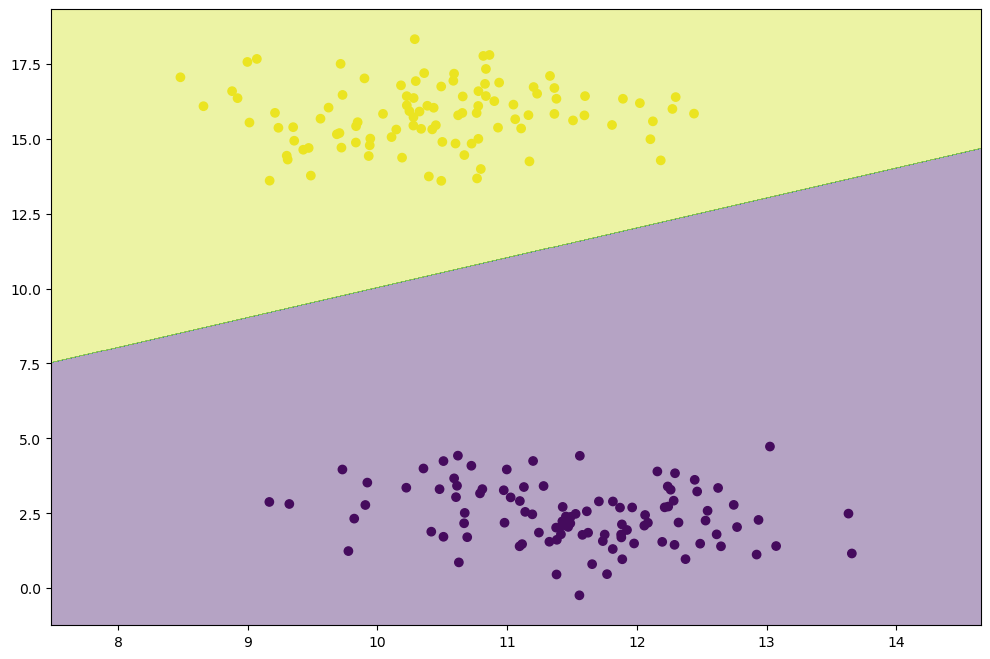

In [32]:
from sklearn import datasets

X, y = datasets.make_blobs(centers=2, n_samples=200)

X += (10,10)

perc = Perceptron(0.1, 1000)
perc.fit(X, y)
draw_boundary(perc, X, y)

# Multi-layered perceptron

The implementation of a multilayer neural network is similarly simple to that of a perceptron, it is just necessary to reiterate what the adaptation rules look like. We will use matrix notation again.

In [35]:
class MLP:
    
    def __init__(self, layer_sizes, alpha=0.1):
        self.layer_sizes = layer_sizes
        self.layers = []
        self.alpha = alpha
        
        for (p, n) in zip(self.layer_sizes, self.layer_sizes[1:]):
            self.layers.append(np.random.normal(size=(p+1, n)))
        
    def predict(self, X):
        activations = np.array(X)
        try:
            for layer in self.layers:
                activations_1 = self._add_ones(activations) # add 1 for bias
                activations = 1/(1+np.exp(np.dot(activations_1, layer)))
        except Exception as e:
            print("Activations:", activations)
            raise e

        return activations
    
    def fit(self, X, y):
        pass
        # try to implement this yourselves
        
    def _add_ones(self, x): # add a column of ones instead of bias
        ones = np.ones(shape=(x.shape[0],1))
        x = np.append(ones,x, axis=1)        
        return x

In [34]:
a = [1,2,3,4]
list(zip(a[::2], a[1::2]))

[(1, 2), (3, 4)]

In [36]:
mlp = MLP([3,5,2])

mlp.predict(np.array([[1,2,3], [1,2,7]]))

array([[0.17545534, 0.09272581],
       [0.06569801, 0.26046126]])

# Brief introduction to tensorflow

Modern libraries such as `tensorflow` are used nowadays to implement neural networks. Today we will show how to use the so-called keras interface to create and train a simple feedforward network.

In [38]:
# prepare the data

x, y = datasets.make_blobs(n_samples=300, centers=3)

x_train, x_test = x[:250], x[250:]
y_train, y_test = y[:250], y[250:]

import tensorflow as tf

# set the network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ]
)

# set the optimization
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=200, verbose=0)
# predict some of the instances
model.predict(x_test[:10])

array([[0.0977915 , 0.09395631, 0.8082522 ],
       [0.14508197, 0.05916286, 0.7957551 ],
       [0.1488686 , 0.06183642, 0.78929496],
       [0.16402099, 0.05262912, 0.7833499 ],
       [0.87713766, 0.05515761, 0.06770471],
       [0.877094  , 0.05369639, 0.06920956],
       [0.8810177 , 0.05234912, 0.06663324],
       [0.04450678, 0.90020186, 0.05529135],
       [0.8764261 , 0.05530216, 0.06827179],
       [0.8789005 , 0.05399076, 0.06710873]], dtype=float32)

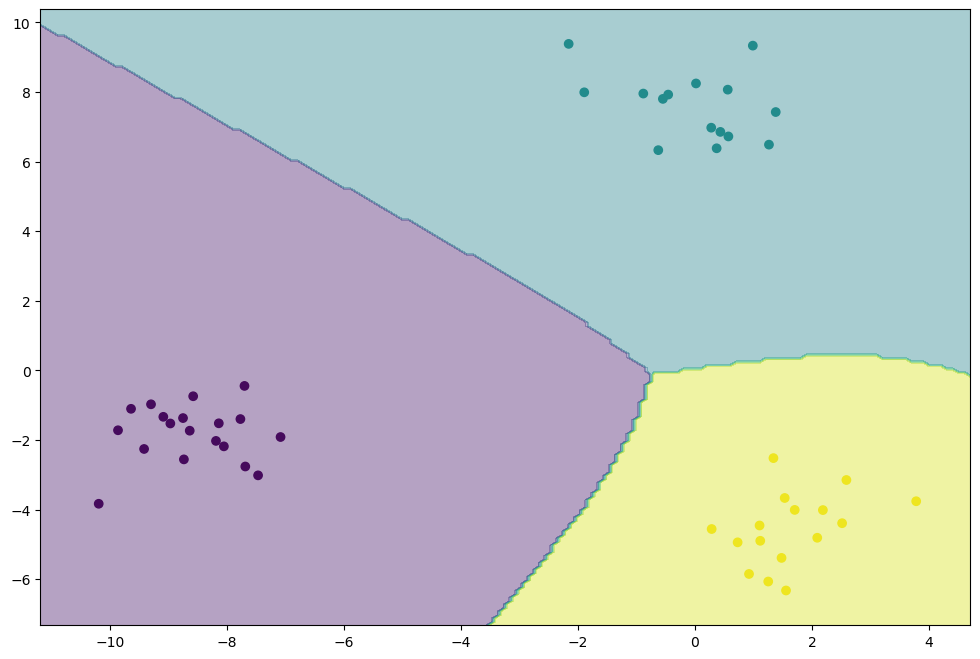

In [42]:
draw_boundary(model, x_test, y_test, one_hot=True)

In most cases, you'll probably use tensorflow at a similar level to above, i.e. you'll be creating models from existing modules. But let's quickly look a little deeper at how tensorflow works.

Tensorflow is really a library for symbolic computation. In it, we can define a computation (expression) that we will evaluate later. From a neural network point of view, it is important that tensorflow can also compute the gradient from this expression, and it also contains a number of optimizers.

There are three main types of "variables" in tensorflow - Placeholder is used for inputs to the expression (when we want to evaluate it later, we have to give them a value), Constant is used for constants, and Variable is used for variables that can possibly be trained. An example of creating a simple expression that computes a linear model of type $b + \sum_{i=1}^3 w_i x_i$ is below. Note that $x$ is a placeholder and doesn't get a value until later. In addition, we also compute the MSE based on $y$, so we have a ready-made model for linear regression that can learn to predict $y$ based on $x$.

The examples below use the old tensorflow v1 interface that had a number of low-level functions. Some of these were (re)moved in tensorflow 2. These are the functions starting with `tf.compat.v1`

In [43]:
import pprint
# create training data and print them
x_train = np.random.uniform(0, 1, size=(100, 3))
y_train = np.dot(x_train, np.array([2,3,1])) + 1
pprint.pprint(list(zip(x_train, y_train))[:10])

[(array([0.70850886, 0.50275083, 0.50712826]), 4.432398461986947),
 (array([0.2434546 , 0.51044307, 0.74826749]), 3.7665058964973857),
 (array([0.66990375, 0.65801135, 0.38948367]), 4.703325226963592),
 (array([0.87219898, 0.79973423, 0.16691525]), 5.310515908903136),
 (array([0.04582926, 0.15371427, 0.15977709]), 1.712578400713699),
 (array([0.16968251, 0.1634636 , 0.20459018]), 2.034345989220256),
 (array([0.80309617, 0.3771695 , 0.23993664]), 3.9776374877620704),
 (array([0.66645661, 0.73206852, 0.66821012]), 5.197328897425425),
 (array([0.32288266, 0.11294657, 0.73065923]), 2.7152642472815076),
 (array([0.24898828, 0.09071312, 0.51803729]), 2.288153208053183)]


In [44]:
# remove the previous model
tf.compat.v1.reset_default_graph()
tf.compat.v1.disable_eager_execution()

# define the model inputs
# None in shape means that this dimension will be defined later - typically it is used for the training/testing data,
# where we do not know how many instance we will get, only one dimension can be None
x = tf.compat.v1.placeholder(tf.float32, shape=(None, 3))
y = tf.compat.v1.placeholder(tf.float32, shape=(None,))

# define the trainable variables, we need to specify initial values for them
w = tf.Variable(tf.compat.v1.random_uniform(shape=(3,)))
b = tf.Variable(tf.compat.v1.random_uniform(shape=(1,)))
# and we can use the variables to define the output of the model
z = tf.tensordot(x, w, 1) + b

# define the loss function
loss = tf.reduce_mean(tf.compat.v1.squared_difference(z, y))

# before we can evaluate the model, we must set the variables initializer
init = tf.compat.v1.global_variables_initializer()

# if we want to train the model, we need to set up the optimizer - it will use the loss function defined above

optim = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(loss)

# tensorflow can also compute gradients
grad = tf.gradients(loss, xs=[w,b])    

# all computations in tensorflow run in a Session
with tf.compat.v1.Session() as sess:
    # if we want to evaluate something, we use Session.run()
    sess.run(init)  # initialize the variables
    
    # we can print the values of the variables (we need to call run to compute the values)
    print('w:', sess.run(w))
    print('b:', sess.run(b))
    # we can specify the values of placeholders with feed-dict
    print('z:', sess.run(z, feed_dict={x: [[1,1,1]]}))
    
    print('loss:', sess.run(loss, feed_dict={x: x_train, y:y_train}))
    # tensorflow can compute the gradients
    wg,bg = sess.run(grad, feed_dict={x: x_train, y:y_train})
    print('wg:', wg)
    print('bg:', bg)
    # one call to optim runs one step of gradient descend
    for k in range(10):
        for i in range(100):
            sess.run(optim, feed_dict={x: x_train, y:y_train})
        print(f'epoch {100*(k+1)}: loss ', sess.run(loss, feed_dict={x: x_train, y:y_train}))
    # we can also print the values to check the result
    print('w:', sess.run(w))
    print('b:', sess.run(b))
    
    # we can also implement the optimization manually using the gradient descend algorithm
    print('='*50)
    
    sess.run(init)
    print('w:', sess.run(w))
    print('b:', sess.run(b))
    
    # let us define the operations from the gradient descend algorithm, we need to define them outside of the loop,
    # otherwise they would be added to the computation loop mutliple times and slow the computation down considerably
    # NOT THIS: sess.run([w.assign_sub(0.1*wg), b.assign_sub(0.1*bg)], feed_dict={x: x_train, y:y_train})
    wg, bg = grad
    w_update=w.assign_sub(0.1*wg)
    b_update=b.assign_sub(0.1*bg)
    
    for k in range(10):
        for i in range(100):
            # session.run can evaluate mutliple expressions at the same time
            sess.run([w_update, b_update], feed_dict={x: x_train, y:y_train})
        print(f'epoch {100*(k+1)}: loss ', sess.run(loss, feed_dict={x: x_train, y:y_train}))
    
    # let't print the values of the parameters again
    w_, b_ = sess.run([w,b])
    print('w:', w_)
    print('b:', b_)

w: [0.5874455  0.01180434 0.09879017]
b: [0.04640996]
z: [0.74445]
loss: 14.286947
wg: [-4.0370755 -4.1398354 -3.931625 ]
bg: [-7.2960553]
epoch 100: loss  0.02421025
epoch 200: loss  0.0035078132
epoch 300: loss  0.0006247149
epoch 400: loss  0.000115622526
epoch 500: loss  2.156297e-05
epoch 600: loss  4.0279856e-06
epoch 700: loss  7.527709e-07
epoch 800: loss  1.4068782e-07
epoch 900: loss  2.630819e-08
epoch 1000: loss  4.9469135e-09
w: [1.9998868 2.9998593 0.9998217]
b: [1.0002326]
w: [0.5766971  0.39635992 0.21874762]
b: [0.05016398]
epoch 100: loss  0.017571451
epoch 200: loss  0.0025621117
epoch 300: loss  0.00045926805
epoch 400: loss  8.518695e-05
epoch 500: loss  1.589648e-05
epoch 600: loss  2.9695918e-06
epoch 700: loss  5.550946e-07
epoch 800: loss  1.0374238e-07
epoch 900: loss  1.9424283e-08
epoch 1000: loss  3.6529388e-09
w: [1.9999026 2.9998791 0.9998468]
b: [1.0001998]
